# Lecture 3 Pandas

In [1]:
import numpy as np

import pandas as pd

Pandas provides two types of classes for handling data:

* Series: a one-dimensional labeled array holding data of any type
such as integers, strings, Python objects etc.


（一维数组，类似于带有标签的列表）
* DataFrame: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

（二维表格，类似于Excel表）

## Object creation

Creating a Series by passing a list of values, letting pandas create a default RangeIndex.



In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
# 创建一个 DataFrame
data = {
    'Name': ['Amy', 'Daming', 'Bob'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
} # 字典
df = pd.DataFrame(data)
print(df)

     Name  Age         City
0     Amy   25     New York
1  Daming   30  Los Angeles
2     Bob   35      Chicago


In [5]:
dates = pd.date_range("20240304", periods=6)

In [6]:
dates

DatetimeIndex(['2024-03-04', '2024-03-05', '2024-03-06', '2024-03-07',
               '2024-03-08', '2024-03-09'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df
#df的三个属性比较重要
#1. index 也就是所谓的索引
#2. columns 也就是所谓的属性
#3. data 也就是实实在在的数据

,A,B,C,D
2024-03-04,-1.241171,-0.404024,0.592492,0.641652
2024-03-05,-0.976160,-0.113652,-3.273569,-1.038332
2024-03-06,0.260856,0.681916,0.795574,1.336226
2024-03-07,-0.423539,-0.242893,-0.357361,0.227930
2024-03-08,-0.614900,-1.547504,1.009052,1.375170
2024-03-09,-0.306448,1.767839,-1.040695,0.927348


In [8]:
print(df.index)
print(df.columns)
print(df.to_numpy())

DatetimeIndex(['2024-03-04', '2024-03-05', '2024-03-06', '2024-03-07',
               '2024-03-08', '2024-03-09'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')
[[-1.24117144 -0.40402409  0.59249225  0.64165167]
 [-0.97616035 -0.11365173 -3.27356892 -1.03833176]
 [ 0.26085606  0.68191586  0.79557391  1.33622621]
 [-0.4235395  -0.24289254 -0.35736119  0.22792987]
 [-0.61490009 -1.54750437  1.00905172  1.37516996]
 [-0.30644751  1.76783904 -1.04069508  0.92734759]]


In [9]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20240304"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

In [10]:
df2 
#列与列之间的属性不需要一样,但是同一列之间数据类型应该是相同的

,A,B,C,D,E,F
0,1.0,2024-03-04,1.0,3,test,foo
1,1.0,2024-03-04,1.0,3,train,foo
2,1.0,2024-03-04,1.0,3,test,foo
3,1.0,2024-03-04,1.0,3,train,foo


In [11]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

## Viewing data

In [12]:
df.head(2)

,A,B,C,D
2024-03-04,-1.241171,-0.404024,0.592492,0.641652
2024-03-05,-0.976160,-0.113652,-3.273569,-1.038332


In [13]:
df.head() #默认是五条数据

,A,B,C,D
2024-03-04,-1.241171,-0.404024,0.592492,0.641652
2024-03-05,-0.976160,-0.113652,-3.273569,-1.038332
2024-03-06,0.260856,0.681916,0.795574,1.336226
2024-03-07,-0.423539,-0.242893,-0.357361,0.227930
2024-03-08,-0.614900,-1.547504,1.009052,1.375170


In [14]:
df.tail(3) 

,A,B,C,D
2024-03-07,-0.423539,-0.242893,-0.357361,0.227930
2024-03-08,-0.614900,-1.547504,1.009052,1.375170
2024-03-09,-0.306448,1.767839,-1.040695,0.927348


In [15]:
df2.to_numpy()

array([[1.0, Timestamp('2024-03-04 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2024-03-04 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2024-03-04 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2024-03-04 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [16]:
df.describe()  
#返回一些统计数据

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.550227,0.023614,-0.379085,0.578332
std,0.528458,1.115064,1.616598,0.902392
min,-1.241171,-1.547504,-3.273569,-1.038332
25%,-0.885845,-0.363741,-0.869862,0.331360
50%,-0.519220,-0.178272,0.117566,0.784500
75%,-0.335721,0.483024,0.744803,1.234007
max,0.260856,1.767839,1.009052,1.375170


In [17]:
df.T

,2024-03-04,2024-03-05,2024-03-06,2024-03-07,2024-03-08,2024-03-09
A,-1.241171,-0.976160,0.260856,-0.423539,-0.614900,-0.306448
B,-0.404024,-0.113652,0.681916,-0.242893,-1.547504,1.767839
C,0.592492,-3.273569,0.795574,-0.357361,1.009052,-1.040695
D,0.641652,-1.038332,1.336226,0.227930,1.375170,0.927348


In [18]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2024-03-04,0.641652,0.592492,-0.404024,-1.241171
2024-03-05,-1.038332,-3.273569,-0.113652,-0.976160
2024-03-06,1.336226,0.795574,0.681916,0.260856
2024-03-07,0.227930,-0.357361,-0.242893,-0.423539
2024-03-08,1.375170,1.009052,-1.547504,-0.614900
2024-03-09,0.927348,-1.040695,1.767839,-0.306448


In [19]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2024-03-09,-0.306448,1.767839,-1.040695,0.927348
2024-03-08,-0.614900,-1.547504,1.009052,1.375170
2024-03-07,-0.423539,-0.242893,-0.357361,0.227930
2024-03-06,0.260856,0.681916,0.795574,1.336226
2024-03-05,-0.976160,-0.113652,-3.273569,-1.038332
2024-03-04,-1.241171,-0.404024,0.592492,0.641652


In [20]:
df.sort_index(
    axis=0,              # 排序的轴,0 表示行索引,1 表示列索引
    level=None,          # 如果索引是多层索引(MultiIndex0,指定按哪一层排序
    ascending=True,      # 是否升序排序,True 为升序,False 为降序
    inplace=False,       # 是否原地修改,True 表示直接修改原对象,False 返回新对象
    kind='quicksort',    # 排序算法，可选 'quicksort', 'mergesort', 'heapsort'
    na_position='last',  # 缺失值的位置，'last' 表示放在最后，'first' 表示放在最前
    sort_remaining=True  # 如果索引是多层索引，是否对其他层也排序
)

,A,B,C,D
2024-03-04,-1.241171,-0.404024,0.592492,0.641652
2024-03-05,-0.976160,-0.113652,-3.273569,-1.038332
2024-03-06,0.260856,0.681916,0.795574,1.336226
2024-03-07,-0.423539,-0.242893,-0.357361,0.227930
2024-03-08,-0.614900,-1.547504,1.009052,1.375170
2024-03-09,-0.306448,1.767839,-1.040695,0.927348


In [21]:
df.sort_values(by="B")

,A,B,C,D
2024-03-08,-0.614900,-1.547504,1.009052,1.375170
2024-03-04,-1.241171,-0.404024,0.592492,0.641652
2024-03-07,-0.423539,-0.242893,-0.357361,0.227930
2024-03-05,-0.976160,-0.113652,-3.273569,-1.038332
2024-03-06,0.260856,0.681916,0.795574,1.336226
2024-03-09,-0.306448,1.767839,-1.040695,0.927348


In [22]:
df.sort_values(
    by=["B","A"],                  # 排序的列名或列名列表
    axis=0,              # 排序的轴，0 表示按行排序，1 表示按列排序
    ascending=True,      # 是否升序排序，True 为升序，False 为降序
    inplace=False,       # 是否原地修改，True 表示直接修改原对象，False 返回新对象
    kind='quicksort',    # 排序算法，可选 'quicksort', 'mergesort', 'heapsort'
    na_position='last'   # 缺失值的位置，'last' 表示放在最后，'first' 表示放在最前
)

,A,B,C,D
2024-03-08,-0.614900,-1.547504,1.009052,1.375170
2024-03-04,-1.241171,-0.404024,0.592492,0.641652
2024-03-07,-0.423539,-0.242893,-0.357361,0.227930
2024-03-05,-0.976160,-0.113652,-3.273569,-1.038332
2024-03-06,0.260856,0.681916,0.795574,1.336226
2024-03-09,-0.306448,1.767839,-1.040695,0.927348


### Get item

In [23]:
df["A"]

2024-03-04   -1.241171
2024-03-05   -0.976160
2024-03-06    0.260856
2024-03-07   -0.423539
2024-03-08   -0.614900
2024-03-09   -0.306448
Freq: D, Name: A, dtype: float64

In [24]:
df[0:3]

,A,B,C,D
2024-03-04,-1.241171,-0.404024,0.592492,0.641652
2024-03-05,-0.976160,-0.113652,-3.273569,-1.038332
2024-03-06,0.260856,0.681916,0.795574,1.336226


In [25]:
df["2024-03-05":"2024-03-09"]

,A,B,C,D
2024-03-05,-0.976160,-0.113652,-3.273569,-1.038332
2024-03-06,0.260856,0.681916,0.795574,1.336226
2024-03-07,-0.423539,-0.242893,-0.357361,0.227930
2024-03-08,-0.614900,-1.547504,1.009052,1.375170
2024-03-09,-0.306448,1.767839,-1.040695,0.927348


In [26]:
#选择列
#print(df["A"]) #选择单列
print(df[["A","B"]]) #选择多列

                   A         B
2024-03-04 -1.241171 -0.404024
2024-03-05 -0.976160 -0.113652
2024-03-06  0.260856  0.681916
2024-03-07 -0.423539 -0.242893
2024-03-08 -0.614900 -1.547504
2024-03-09 -0.306448  1.767839


In [27]:
#loc:基于标签(label)进行选择。
#iloc:基于位置(integer-location)进行选择。

In [28]:
df[dates[0],"A"]

KeyError: (Timestamp('2024-03-04 00:00:00'), 'A')

In [ ]:
df[0,0]

KeyError: (0, 0)

### Selection by label

In [29]:
#选择数据

#选择行
print(df.iloc[0])   #选择第一行
print(df.loc["2024-03-05"]) #选择第一行（基于标签）



A   -1.241171
B   -0.404024
C    0.592492
D    0.641652
Name: 2024-03-04 00:00:00, dtype: float64
A   -0.976160
B   -0.113652
C   -3.273569
D   -1.038332
Name: 2024-03-05 00:00:00, dtype: float64


In [30]:
df.loc["2024-03-05":"2024-03-09", ["A", "B"]]

,A,B
2024-03-05,-0.976160,-0.113652
2024-03-06,0.260856,0.681916
2024-03-07,-0.423539,-0.242893
2024-03-08,-0.614900,-1.547504
2024-03-09,-0.306448,1.767839


In [31]:
df.loc[dates[0], "A"]

-1.241171438901209

### Selection by position

In [32]:
df.iloc[3]

A   -0.423539
B   -0.242893
C   -0.357361
D    0.227930
Name: 2024-03-07 00:00:00, dtype: float64

In [33]:
df.iloc[3:5, 0:2]

,A,B
2024-03-07,-0.423539,-0.242893
2024-03-08,-0.614900,-1.547504


In [34]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2024-03-05,-0.976160,-3.273569
2024-03-06,0.260856,0.795574
2024-03-08,-0.614900,1.009052


In [35]:
df.iloc[1:3, :]

,A,B,C,D
2024-03-05,-0.976160,-0.113652,-3.273569,-1.038332
2024-03-06,0.260856,0.681916,0.795574,1.336226


In [36]:
df.iloc[:, 1:3]

,B,C
2024-03-04,-0.404024,0.592492
2024-03-05,-0.113652,-3.273569
2024-03-06,0.681916,0.795574
2024-03-07,-0.242893,-0.357361
2024-03-08,-1.547504,1.009052
2024-03-09,1.767839,-1.040695


In [37]:
df.iloc[1, 1]

-0.11365173030980552

### Boolean indexing

In [38]:
df[df["A"] > 0.5]

,A,B,C,D


In [39]:
df

,A,B,C,D
2024-03-04,-1.241171,-0.404024,0.592492,0.641652
2024-03-05,-0.976160,-0.113652,-3.273569,-1.038332
2024-03-06,0.260856,0.681916,0.795574,1.336226
2024-03-07,-0.423539,-0.242893,-0.357361,0.227930
2024-03-08,-0.614900,-1.547504,1.009052,1.375170
2024-03-09,-0.306448,1.767839,-1.040695,0.927348


In [40]:
df["A"]>0

2024-03-04    False
2024-03-05    False
2024-03-06     True
2024-03-07    False
2024-03-08    False
2024-03-09    False
Freq: D, Name: A, dtype: bool

In [41]:
df>0

,A,B,C,D
2024-03-04,False,False,True,True
2024-03-05,False,False,False,False
2024-03-06,True,True,True,True
2024-03-07,False,False,False,True
2024-03-08,False,False,True,True
2024-03-09,False,True,False,True


In [42]:
df[df > 0]

,A,B,C,D
2024-03-04,NaN,NaN,0.592492,0.641652
2024-03-05,NaN,NaN,NaN,NaN
2024-03-06,0.260856,0.681916,0.795574,1.336226
2024-03-07,NaN,NaN,NaN,0.227930
2024-03-08,NaN,NaN,1.009052,1.375170
2024-03-09,NaN,1.767839,NaN,0.927348


## add and drop


In [43]:
df2 = df.copy()

In [44]:
#增加一列
df2["E"] = ["one", "one", "two", "three", "four", "three"]

In [45]:
df2

,A,B,C,D,E
2024-03-04,-1.241171,-0.404024,0.592492,0.641652,one
2024-03-05,-0.976160,-0.113652,-3.273569,-1.038332,one
2024-03-06,0.260856,0.681916,0.795574,1.336226,two
2024-03-07,-0.423539,-0.242893,-0.357361,0.227930,three
2024-03-08,-0.614900,-1.547504,1.009052,1.375170,four
2024-03-09,-0.306448,1.767839,-1.040695,0.927348,three


In [46]:
#删除一列
df2 = df2.drop(columns=['E'])


In [47]:
df2

,A,B,C,D
2024-03-04,-1.241171,-0.404024,0.592492,0.641652
2024-03-05,-0.976160,-0.113652,-3.273569,-1.038332
2024-03-06,0.260856,0.681916,0.795574,1.336226
2024-03-07,-0.423539,-0.242893,-0.357361,0.227930
2024-03-08,-0.614900,-1.547504,1.009052,1.375170
2024-03-09,-0.306448,1.767839,-1.040695,0.927348


### Setting

In [48]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20240304", periods=6))


In [49]:
df["F"] = s1

In [50]:
df

,A,B,C,D,F
2024-03-04,-1.241171,-0.404024,0.592492,0.641652,1
2024-03-05,-0.976160,-0.113652,-3.273569,-1.038332,2
2024-03-06,0.260856,0.681916,0.795574,1.336226,3
2024-03-07,-0.423539,-0.242893,-0.357361,0.227930,4
2024-03-08,-0.614900,-1.547504,1.009052,1.375170,5
2024-03-09,-0.306448,1.767839,-1.040695,0.927348,6


In [51]:
df.loc[dates[0], "A"] = 0

In [52]:
df

,A,B,C,D,F
2024-03-04,0.000000,-0.404024,0.592492,0.641652,1
2024-03-05,-0.976160,-0.113652,-3.273569,-1.038332,2
2024-03-06,0.260856,0.681916,0.795574,1.336226,3
2024-03-07,-0.423539,-0.242893,-0.357361,0.227930,4
2024-03-08,-0.614900,-1.547504,1.009052,1.375170,5
2024-03-09,-0.306448,1.767839,-1.040695,0.927348,6


In [53]:
df.iloc[0, 1] = 0

In [54]:
df.loc[:, "D"] = np.array([5] * len(df))

In [55]:
df

,A,B,C,D,F
2024-03-04,0.000000,0.000000,0.592492,5.0,1
2024-03-05,-0.976160,-0.113652,-3.273569,5.0,2
2024-03-06,0.260856,0.681916,0.795574,5.0,3
2024-03-07,-0.423539,-0.242893,-0.357361,5.0,4
2024-03-08,-0.614900,-1.547504,1.009052,5.0,5
2024-03-09,-0.306448,1.767839,-1.040695,5.0,6


In [56]:
df2 = df.copy()

In [57]:
df2[df2 > 0] = -df2

In [58]:
df2

,A,B,C,D,F
2024-03-04,0.000000,0.000000,-0.592492,-5.0,-1
2024-03-05,-0.976160,-0.113652,-3.273569,-5.0,-2
2024-03-06,-0.260856,-0.681916,-0.795574,-5.0,-3
2024-03-07,-0.423539,-0.242893,-0.357361,-5.0,-4
2024-03-08,-0.614900,-1.547504,-1.009052,-5.0,-5
2024-03-09,-0.306448,-1.767839,-1.040695,-5.0,-6


## Missing value

In [59]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [60]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [61]:
df1

,A,B,C,D,F,E
2024-03-04,0.000000,0.000000,0.592492,5.0,1,1.0
2024-03-05,-0.976160,-0.113652,-3.273569,5.0,2,1.0
2024-03-06,0.260856,0.681916,0.795574,5.0,3,NaN
2024-03-07,-0.423539,-0.242893,-0.357361,5.0,4,NaN


In [62]:
#去掉缺失值
df1.dropna(how="any")

,A,B,C,D,F,E
2024-03-04,0.00000,0.000000,0.592492,5.0,1,1.0
2024-03-05,-0.97616,-0.113652,-3.273569,5.0,2,1.0


In [63]:
#填充缺失值
df1.fillna(value=5)

,A,B,C,D,F,E
2024-03-04,0.000000,0.000000,0.592492,5.0,1,1.0
2024-03-05,-0.976160,-0.113652,-3.273569,5.0,2,1.0
2024-03-06,0.260856,0.681916,0.795574,5.0,3,5.0
2024-03-07,-0.423539,-0.242893,-0.357361,5.0,4,5.0


In [64]:
#判断是否是缺失值
pd.isna(df1)

,A,B,C,D,F,E
2024-03-04,False,False,False,False,False,False
2024-03-05,False,False,False,False,False,False
2024-03-06,False,False,False,False,False,True
2024-03-07,False,False,False,False,False,True


## Operations

In [65]:
df

,A,B,C,D,F
2024-03-04,0.000000,0.000000,0.592492,5.0,1
2024-03-05,-0.976160,-0.113652,-3.273569,5.0,2
2024-03-06,0.260856,0.681916,0.795574,5.0,3
2024-03-07,-0.423539,-0.242893,-0.357361,5.0,4
2024-03-08,-0.614900,-1.547504,1.009052,5.0,5
2024-03-09,-0.306448,1.767839,-1.040695,5.0,6


In [66]:
df.mean()

A   -0.343365
B    0.090951
C   -0.379085
D    5.000000
F    3.500000
dtype: float64

In [67]:
df.mean(axis=1)

2024-03-04    1.318498
2024-03-05    0.527324
2024-03-06    1.947669
2024-03-07    1.595241
2024-03-08    1.769329
2024-03-09    2.284139
Freq: D, dtype: float64

In [68]:
df.describe()

,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.0,6.000000
mean,-0.343365,0.090951,-0.379085,5.0,3.500000
std,0.439303,1.096113,1.616598,0.0,1.870829
min,-0.976160,-1.547504,-3.273569,5.0,1.000000
25%,-0.567060,-0.210582,-0.869862,5.0,2.250000
50%,-0.364994,-0.056826,0.117566,5.0,3.500000
75%,-0.076612,0.511437,0.744803,5.0,4.750000
max,0.260856,1.767839,1.009052,5.0,6.000000


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria

* Applying a function to each group independently

* Combining the results into a data structure

In [69]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [70]:
df

,A,B,C,D
0,foo,one,0.413121,1.100084
1,bar,one,0.541124,0.102256
2,foo,two,-0.841693,0.498378
3,bar,three,1.598185,1.468301
4,foo,two,-1.228712,-0.224934
5,bar,two,0.495782,-0.852360
6,foo,one,-0.117656,-0.284381
7,foo,three,0.210982,-1.775775


In [71]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,2.635092,0.718196
foo,-1.563958,-0.686627


In [72]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.541124  0.102256
    three  1.598185  1.468301
    two    0.495782 -0.852360
foo one    0.295465  0.815703
    three  0.210982 -1.775775
    two   -2.070404  0.273445

## Ploting

In [73]:
import matplotlib.pyplot as plt

In [74]:
plt.close("all")

<Axes: >

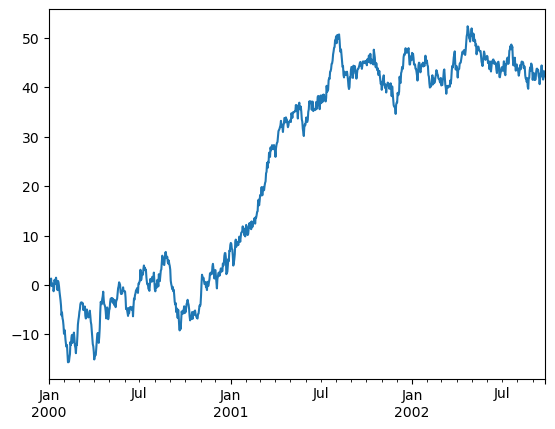

In [75]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot()

In [76]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

In [77]:
df = df.cumsum()

In [78]:
df

,A,B,C,D
2000-01-01,-1.172783,0.044360,-2.361693,-0.622425
2000-01-02,-1.070020,1.009502,-2.880690,-0.891395
2000-01-03,-1.486678,1.301378,-3.203071,-0.754315
2000-01-04,-0.330808,0.303737,-2.713988,-0.629316
2000-01-05,-0.761535,1.156508,-0.135491,-0.412994
...,...,...,...,...
2002-09-22,-7.762962,54.599001,10.544787,-6.538643
2002-09-23,-8.056499,52.359273,8.138568,-6.163019
2002-09-24,-7.893954,50.376242,7.260086,-3.959719
2002-09-25,-9.613411,50.728966,7.289174,-4.203090


<Figure size 640x480 with 0 Axes>

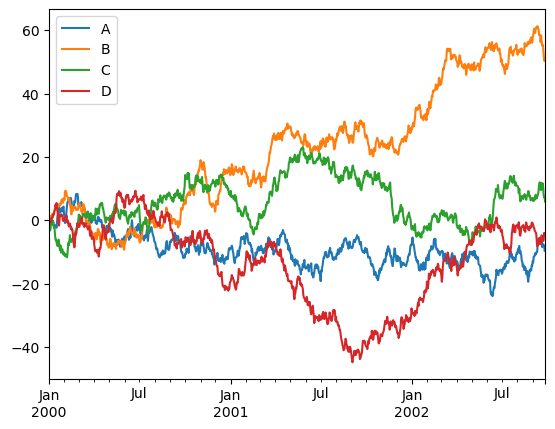

In [81]:
plt.figure()

df.plot()

plt.legend(loc='best')